# ABUSIVE LANGUAGE DETECTION

Data file contains 5 columns:

```count``` = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

```hate_speech``` = number of CF users who judged the tweet to be hate speech.

```offensive_language``` = number of CF users who judged the tweet to be offensive.

```neither``` = number of CF users who judged the tweet to be neither offensive nor non-offensive.

```class``` = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from wordcloud import WordCloud

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 

In [2]:
df_offensive=pd.read_csv("labeled_data.csv")

In [3]:
df_offensive

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df_offensive.shape

(24783, 7)

In [5]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
tweets = df_offensive['tweet']

In [7]:
tweets

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [8]:
df_offensive.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


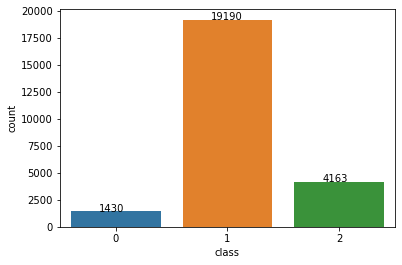

In [10]:
cp = sns.countplot('class', data=df_offensive)

for p in cp.patches:
   cp.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [11]:
df_offensive['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [12]:
df_offensive[df_offensive['class']==0]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...,...
24576,25084,3,2,1,0,0,this guy is the biggest faggot omfg
24685,25197,3,2,1,0,0,which one of these names is more offensive kik...
24751,25264,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
24776,25289,3,3,0,0,0,you're all niggers


In [13]:
df_offensive[df_offensive['class']==1]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
...,...,...,...,...,...,...,...
24774,25287,3,0,3,0,1,you really care bout dis bitch. my dick all in...
24775,25288,3,0,3,0,1,"you worried bout other bitches, you need me for?"
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...


In [14]:
df_offensive[df_offensive['class']==2]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...
24737,25250,3,0,1,2,2,yea so about @N_tel 's new friend.. all my fri...
24767,25280,3,0,1,2,2,"you know what they say, the early bird gets th..."
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."


In [15]:
df_offensive.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

#### As of now we can see that the data is highly imbalanced, where class 1 has 19190 rows, class 2 has 4163 rows and class 0 has 1430 rows.

We dont need all the columns, the required columns are tweet and class, so we'll delete all other columns

In [16]:
df_offensive.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis = 1, inplace = True)

In [17]:
df_offensive.columns

Index(['class', 'tweet'], dtype='object')

In [18]:
df_offensive

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


### Cleaning tweets
Lets do cleaning in our tweets

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def clean_text(data):
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
      review = ' '.join(review)
      corpus.append(review)

    return np.array(corpus)

In [21]:
tweets = clean_text(df_offensive['tweet'].values)

In [22]:
tweets.shape

(24783,)

In [23]:
tweets

array(['woman complain clean hous amp man alway take trash',
       'boy dat cold tyga dwn bad cuffin dat hoe place',
       'dawg ever fuck bitch start cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin di',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype='<U124')

### Creating WordCloud

Lets create wordcloud and see the most used words in the respective classes

In [24]:
def get_wordcloud(text, title):
    wordcloud = WordCloud(width = 2000, height = 1000).generate(text)
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [25]:
hate_tweets = [sentence for sentence, label in zip(tweets, df_offensive['class']) if label == 0]
print(hate_tweets)

['queer gaywad', 'alsarabsss he beaner smh tell he mexican', 'fuck gay blacklist hoe hold tehgodclan anyway', 'lmfaoooo hate black peopl black peopl nigger', 'least not nigger lmfao', 'ariza snake coward least crippl like hero roach lmaoo', 'drake new shoe releas nike jordan ye glitter shoe dude fag', 'gerryshalloweenparti halloween yesterday stupid nigger', 'bore suppos cute faggot sometim', 'lassen coach want feel youll get nig doubt', 'jacki retard blondeproblem least make grill chees', 'stacey dash baddest bitch evaaaa', 'worri nigga see worri nigga see dat nigga fuckin bitch', 'hey look video man found kidnap girl ohio nigger shitmybosssay', 'let kill cracker babi wtf hear wow', 'grandma use call porch monkey time come think refer broken bottl nigger knife', 'nah thought photoshop face faggot smmfh hate yall', 'peopl time aryan race stand say mongerl turn world ghetto slum', 'sour appl bitter bitch not fuckin wit', 'hate nigger hate faggot hate spic kkk ralli', 'queer hut like but

In [26]:
off_tweets = [sentence for sentence, label in zip(tweets, df_offensive['class']) if label == 1]
off_tweets

['boy dat cold tyga dwn bad cuffin dat hoe place',
 'dawg ever fuck bitch start cri confus shit',
 'look like tranni',
 'shit hear might true might faker bitch told',
 'shit blow claim faith somebodi still fuck hoe',
 'not sit hate anoth bitch got much shit go',
 'caus tire big bitch come skinni girl',
 'amp might not get bitch back amp that',
 'hobbi includ fight mariam bitch',
 'keek bitch curv everyon lol walk convers like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatev',
 'bitch love',
 'bitch get cut everyday',
 'black bottl amp bad bitch',
 'broke bitch cant tell noth',
 'cancel bitch like nino',
 'cant see hoe wont chang',
 'fuck bitch dont even suck dick kermit video bout fuck',
 'got bitch tip toe hardwood floor',
 'pussi lip like heaven door',
 'hoe hit',
 'met pussi ocean gave pussi pill',
 'need trippi bitch fuck hennessi',
 'spend money want bitch busi',
 'txt old bitch new bitch pu

In [27]:
none_tweets = [sentence for sentence, label in zip(tweets, df_offensive['class']) if label == 2]
none_tweets

['woman complain clean hous amp man alway take trash',
 'momma said pussi cat insid doghous',
 'simplyaddictedtoguy woof woof hot scalli lad',
 'woof woof hot sole',
 'lemmi eat oreo amp dish one oreo lol',
 'eggplant emoji doe say look like scream lmao',
 'babi monkey bathtim awwww soooo ador',
 'basebal season win yanke love start',
 'earli bird night owl wise worm',
 'overdos heavi drug sound bad tonight pussi shit everi day',
 'pit bull photograph love fairi tale creatur fairi tale creatur',
 'long laker trash could careless real hahaha',
 'play soccer cheat girl wear khaki colour cargo haircut yup',
 'ghetto smart idc',
 'want get nose bad boi scalli chav sockfetish stink hot sox leg',
 'peel peel bring back rewind back move shaq line ooooow said trash',
 'ucfpinkpa come stay aliv knight nation still earli bird special comeatmeut',
 'stay tune updat report week bum',
 'play soccer cheat girl wear khaki colour cargo haircut ye lmfao',
 'piss lad past would lick dirti sole slept',
 

In [28]:
hate_words = ' '.join(hate_tweets)
off_words = ' '.join(off_tweets)
none_words = ' '.join(none_tweets)

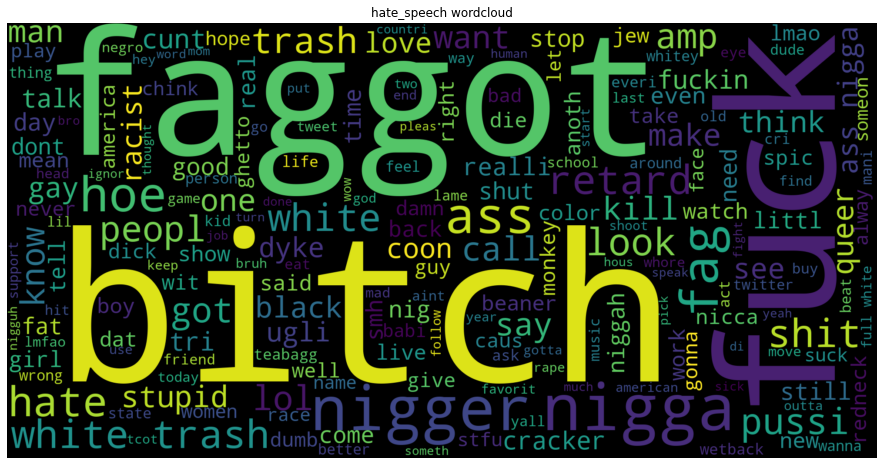

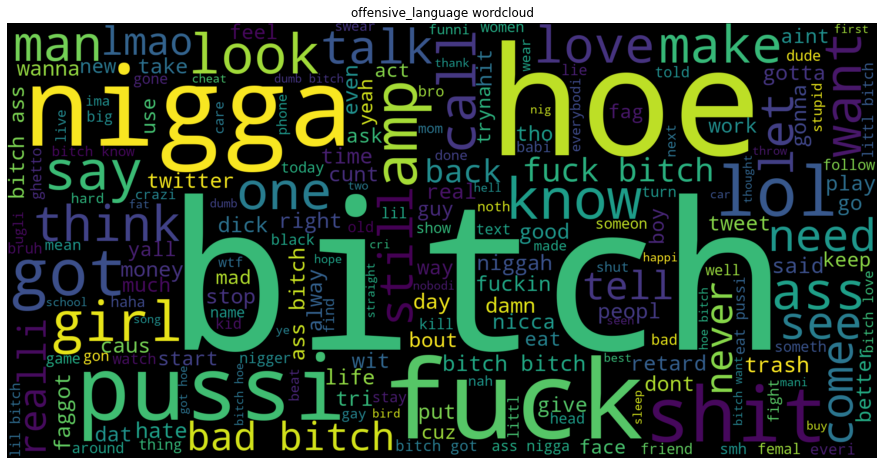

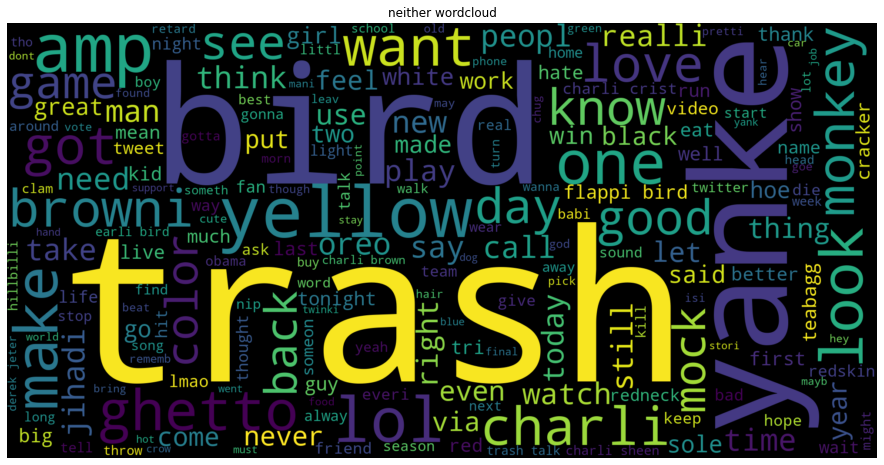

In [29]:
get_wordcloud(hate_words, 'hate_speech wordcloud')
get_wordcloud(off_words, 'offensive_language wordcloud')
get_wordcloud(none_words, 'neither wordcloud')

In [30]:
# splitting into train and test from tweets
x_train, x_test, y_train, y_test = train_test_split(tweets, df_offensive['class'], test_size = 0.2, random_state = 8, stratify = df_offensive['class'])

In [31]:
x_train.shape, x_test.shape

((19826,), (4957,))

In [32]:
y_train.shape, y_test.shape

((19826,), (4957,))

In [33]:
y_train.value_counts()

1    15352
2     3330
0     1144
Name: class, dtype: int64

In [34]:
y_test.value_counts()

1    3838
2     833
0     286
Name: class, dtype: int64

### Extrating features from Tokenizer

In [35]:
tweet_tokenizer = TweetTokenizer()

Lets first test with not converting the x_test with .toarray(), and then we'll also convert x_test with .toarray().

In [36]:
def vectorizer(x_train, x_test): 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 2000, stop_words='english', ngram_range=(1,5))
    X_train_vect = vectorizer.fit_transform(x_train).toarray()
    X_test_vect = vectorizer.transform(x_test).toarray()
    return X_train_vect, X_test_vect

In [37]:
x_train_vectorizer, x_test_vectorizer = vectorizer(x_train, x_test)
x_train_vectorizer.shape, x_test_vectorizer.shape

((19826, 2000), (4957, 2000))

In [38]:
def print_score(y_true, y_pred):
    print('Accuracy Score:', '{:.2f}'.format(accuracy_score(y_test, y_pred) * 100), '%')
    print('Precision Score:', '{:.2f}'.format(precision_score(y_test, y_pred, average = 'macro') * 100), '%')
    print('Recall Score:', '{:.2f}'.format(recall_score(y_test, y_pred, average = 'macro') * 100), '%')
    print('F1 Score:', '{:.2f}'.format(f1_score(y_test, y_pred, average = 'macro') * 100), '%')

## Logistic Regression

training our very first model

In [39]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 8)
model.fit(x_train_vectorizer, y_train.ravel())

LogisticRegression(multi_class='ovr', random_state=8, solver='liblinear')

In [40]:
y_pred = model.predict(x_test_vectorizer)

In [41]:
y_pred.shape

(4957,)

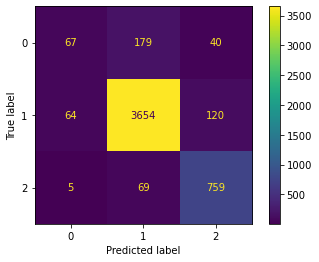

In [42]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [43]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.49      0.23      0.32       286
     class 1       0.94      0.95      0.94      3838
     class 2       0.83      0.91      0.87       833

    accuracy                           0.90      4957
   macro avg       0.75      0.70      0.71      4957
weighted avg       0.89      0.90      0.89      4957



In [44]:
print_score(y_test, y_pred)

Accuracy Score: 90.38 %
Precision Score: 75.17 %
Recall Score: 69.92 %
F1 Score: 70.94 %


### Undersampling

As we know our dataset is highly imbalanced lets try first with undersampling our data.

In [45]:
df_offensive['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [46]:
n_off, n_none, n_hate = df_offensive['class'].value_counts()
n_hate, n_off, n_none

(1430, 19190, 4163)

As the no. of ```hate_speech``` class is lowest so, we'll undersample all other classes to match the count of ```hate_speech```.

In [47]:
df_hate = df_offensive[df_offensive['class'] == 0]
df_off = df_offensive[df_offensive['class'] == 1]
df_none = df_offensive[df_offensive['class'] == 2]

In [48]:
df_off_under = df_off.sample(n_hate, random_state = 8)
df_none_under = df_none.sample(n_hate, random_state = 8)

In [49]:
df_under = pd.concat([df_hate, df_off_under, df_none_under], axis = 0)
df_under['class'].value_counts()

0    1430
1    1430
2    1430
Name: class, dtype: int64

#### Lets clean this new undersampled data

In [50]:
tweets_under = clean_text(df_under['tweet'].values)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(tweets_under, df_under['class'], test_size = 0.20, random_state = 8, stratify=df_under['class'])

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3432,), (858,), (3432,), (858,))

In [53]:
x_train_vectorizer, x_test_vectorizer = vectorizer(x_train, x_test)
x_train_vectorizer.shape, x_test_vectorizer.shape

((3432, 2000), (858, 2000))

In [54]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 8)
model.fit(x_train_vectorizer, y_train.ravel())

LogisticRegression(multi_class='ovr', random_state=8, solver='liblinear')

In [55]:
y_pred = model.predict(x_test_vectorizer)

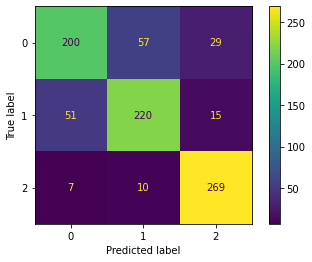

In [56]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [57]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.70      0.74       286
     class 1       0.77      0.77      0.77       286
     class 2       0.86      0.94      0.90       286

    accuracy                           0.80       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.80      0.80      0.80       858



In [58]:
print_score(y_test, y_pred)

Accuracy Score: 80.30 %
Precision Score: 80.04 %
Recall Score: 80.30 %
F1 Score: 80.04 %


### Oversampling

Lets now try oversampling our data

In [59]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=8)
df_none_over = df_none.sample(n_off, replace=True, random_state=8)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

In [60]:
df_over['class'].value_counts()

0    19190
1    19190
2    19190
Name: class, dtype: int64

#### Lets clean this new undersampled data

In [61]:
tweets_over = clean_text(df_over['tweet'].values)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(tweets_over, df_over['class'], test_size = 0.20, random_state = 8, stratify=df_over['class'])

In [63]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((46056,), (11514,), (46056,), (11514,))

In [64]:
x_train_vectorizer, x_test_vectorizer = vectorizer(x_train, x_test)
x_train_vectorizer.shape, x_test_vectorizer.shape

((46056, 2000), (11514, 2000))

In [65]:
# Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 8)
model.fit(x_train_vectorizer, y_train.ravel())

LogisticRegression(multi_class='ovr', random_state=8, solver='liblinear')

In [66]:
y_pred = model.predict(x_test_vectorizer)

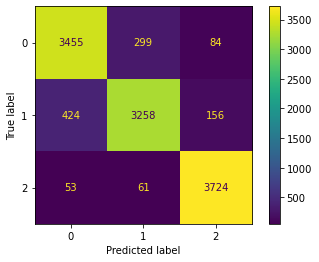

In [67]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [68]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89      3838
     class 1       0.90      0.85      0.87      3838
     class 2       0.94      0.97      0.95      3838

    accuracy                           0.91     11514
   macro avg       0.91      0.91      0.91     11514
weighted avg       0.91      0.91      0.91     11514



In [69]:
print_score(y_test, y_pred)

Accuracy Score: 90.65 %
Precision Score: 90.62 %
Recall Score: 90.65 %
F1 Score: 90.60 %


#### Oversampling resulted better than undersampling, but since the data is repeated, its pretty hard to tell if the model generalizes the problem or not? So as we have a better results with oversampling we'll use oversampling data for further models and see how they perform.

In [70]:
tfidf = TfidfTransformer()

In [71]:
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [72]:
# Logistic Regression with tfidf
model_tfidf = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 8)
model_tfidf.fit(x_train_tfidf, y_train.ravel())

LogisticRegression(multi_class='ovr', random_state=8, solver='liblinear')

In [73]:
y_pred_tfidf = model_tfidf.predict(x_test_tfidf)

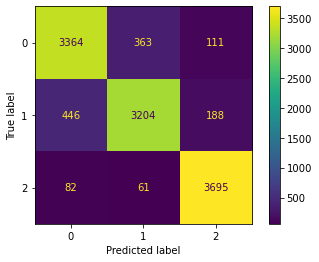

In [74]:
plot_confusion_matrix(model_tfidf, X = x_test_tfidf, y_true = y_test)

In [75]:
print(classification_report(y_test, y_pred_tfidf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87      3838
     class 1       0.88      0.83      0.86      3838
     class 2       0.93      0.96      0.94      3838

    accuracy                           0.89     11514
   macro avg       0.89      0.89      0.89     11514
weighted avg       0.89      0.89      0.89     11514



In [76]:
print_score(y_test, y_pred_tfidf)

Accuracy Score: 89.13 %
Precision Score: 89.09 %
Recall Score: 89.13 %
F1 Score: 89.07 %


### Naive Bayes

In [77]:
# Multinomial NB
model = MultinomialNB().fit(x_train_vectorizer, y_train)

In [78]:
y_pred = model.predict(x_test_vectorizer)

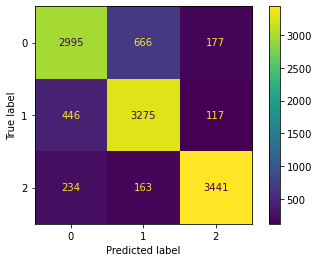

In [79]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [80]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.78      0.80      3838
     class 1       0.80      0.85      0.82      3838
     class 2       0.92      0.90      0.91      3838

    accuracy                           0.84     11514
   macro avg       0.84      0.84      0.84     11514
weighted avg       0.84      0.84      0.84     11514



In [81]:
print_score(y_test, y_pred)

Accuracy Score: 84.34 %
Precision Score: 84.48 %
Recall Score: 84.34 %
F1 Score: 84.36 %


In [82]:
# Multinomial NB with tfidf
model_tfidf = MultinomialNB().fit(x_train_tfidf, y_train)

In [83]:
y_pred_tfidf = model_tfidf.predict(x_test_tfidf)

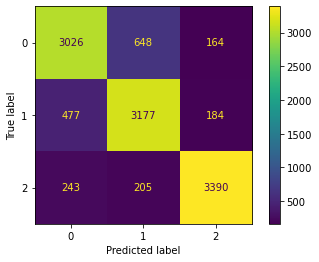

In [84]:
plot_confusion_matrix(model_tfidf, X = x_test_tfidf, y_true = y_test)

In [85]:
print(classification_report(y_test, y_pred_tfidf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.79      0.80      3838
     class 1       0.79      0.83      0.81      3838
     class 2       0.91      0.88      0.89      3838

    accuracy                           0.83     11514
   macro avg       0.83      0.83      0.83     11514
weighted avg       0.83      0.83      0.83     11514



In [86]:
print_score(y_test, y_pred_tfidf)

Accuracy Score: 83.32 %
Precision Score: 83.43 %
Recall Score: 83.32 %
F1 Score: 83.35 %


### Support Vector Machines (SVM) Classifier

In [87]:
# Linear SVM classifier
model = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 8, verbose = 1)

In [88]:
model.fit(x_train_vectorizer, y_train)

[LibLinear]

LinearSVC(class_weight='balanced', max_iter=10000, random_state=8, verbose=1)

In [89]:
y_pred = model.predict(x_test_vectorizer)

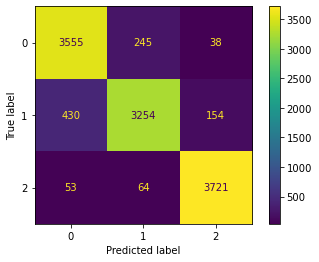

In [90]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [91]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.93      0.90      3838
     class 1       0.91      0.85      0.88      3838
     class 2       0.95      0.97      0.96      3838

    accuracy                           0.91     11514
   macro avg       0.91      0.91      0.91     11514
weighted avg       0.91      0.91      0.91     11514



In [92]:
print_score(y_test, y_pred)

Accuracy Score: 91.45 %
Precision Score: 91.49 %
Recall Score: 91.45 %
F1 Score: 91.41 %


In [93]:
# Linear SVM Classifier with tfidf
model_tfidf = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 8, verbose = 1)

In [94]:
model_tfidf.fit(x_train_tfidf, y_train)

[LibLinear]

LinearSVC(class_weight='balanced', max_iter=10000, random_state=8, verbose=1)

In [95]:
y_pred_tfidf = model_tfidf.predict(x_test_tfidf)

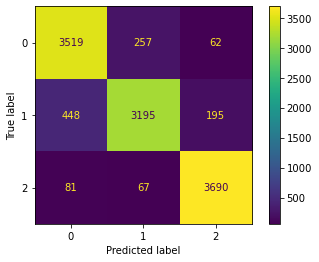

In [96]:
plot_confusion_matrix(model_tfidf, X = x_test_tfidf, y_true = y_test)

In [97]:
print(classification_report(y_test, y_pred_tfidf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.92      0.89      3838
     class 1       0.91      0.83      0.87      3838
     class 2       0.93      0.96      0.95      3838

    accuracy                           0.90     11514
   macro avg       0.90      0.90      0.90     11514
weighted avg       0.90      0.90      0.90     11514



In [98]:
print_score(y_test, y_pred_tfidf)

Accuracy Score: 90.36 %
Precision Score: 90.40 %
Recall Score: 90.36 %
F1 Score: 90.30 %


### RandomForest Classifier

In [99]:
# Random Forest
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 8, min_samples_split = 2, random_state = 8, verbose = 1, n_jobs = -1)

In [100]:
model.fit(x_train_vectorizer, y_train)
y_pred = model.predict(x_test_vectorizer)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


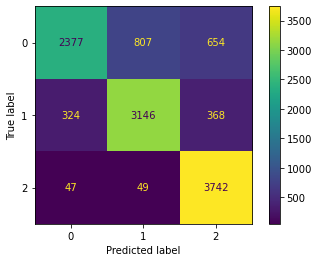

In [101]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [102]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.62      0.72      3838
     class 1       0.79      0.82      0.80      3838
     class 2       0.79      0.97      0.87      3838

    accuracy                           0.80     11514
   macro avg       0.81      0.80      0.80     11514
weighted avg       0.81      0.80      0.80     11514



In [103]:
print_score(y_test, y_pred)

Accuracy Score: 80.47 %
Precision Score: 81.22 %
Recall Score: 80.47 %
F1 Score: 79.81 %


In [104]:
# Random Forest with tfidf
model_tfidf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 8, min_samples_split = 2, random_state = 8, verbose = 1, n_jobs = -1)

In [105]:
model_tfidf.fit(x_train_tfidf, y_train)
y_pred_tfidf = model.predict(x_test_tfidf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


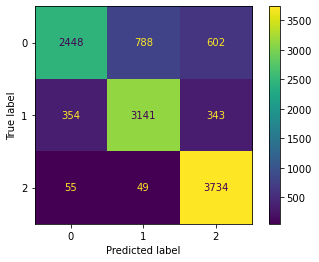

In [106]:
plot_confusion_matrix(model_tfidf, X = x_test_tfidf, y_true = y_test)

In [107]:
print(classification_report(y_test, y_pred_tfidf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.14      0.24      3838
     class 1       0.92      0.09      0.16      3838
     class 2       0.36      1.00      0.53      3838

    accuracy                           0.41     11514
   macro avg       0.72      0.41      0.31     11514
weighted avg       0.72      0.41      0.31     11514



In [108]:
print_score(y_test, y_pred_tfidf)

Accuracy Score: 40.79 %
Precision Score: 71.92 %
Recall Score: 40.79 %
F1 Score: 31.09 %


### XGBoost

In [109]:
# XGBoost
model = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=100, eval_metric='auc', n_jobs = -1, verbose = 1, random_state = 8)

In [110]:
model.fit(x_train_vectorizer, y_train)
y_pred = model.predict(x_test_vectorizer)

[14:11:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



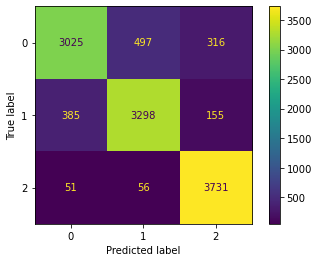

In [111]:
plot_confusion_matrix(model, X = x_test_vectorizer, y_true = y_test)

In [112]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.79      0.83      3838
     class 1       0.86      0.86      0.86      3838
     class 2       0.89      0.97      0.93      3838

    accuracy                           0.87     11514
   macro avg       0.87      0.87      0.87     11514
weighted avg       0.87      0.87      0.87     11514



In [113]:
print_score(y_test, y_pred)

Accuracy Score: 87.32 %
Precision Score: 87.28 %
Recall Score: 87.32 %
F1 Score: 87.16 %


In [114]:
# XGBoost with tfidf
model_tfidf = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=100, eval_metric='auc', n_jobs = -1, verbose = 1, random_state = 8)

In [115]:
model_tfidf.fit(x_train_tfidf, y_train)
y_pred_tfidf = model.predict(x_test_tfidf)

[14:18:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



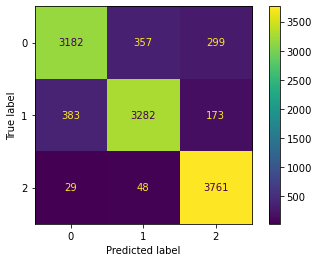

In [116]:
plot_confusion_matrix(model_tfidf, X = x_test_tfidf, y_true = y_test)

In [117]:
print(classification_report(y_test, y_pred_tfidf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.17      0.28      3838
     class 1       0.86      0.09      0.16      3838
     class 2       0.37      0.99      0.54      3838

    accuracy                           0.42     11514
   macro avg       0.69      0.42      0.33     11514
weighted avg       0.69      0.42      0.33     11514



In [118]:
print_score(y_test, y_pred_tfidf)

Accuracy Score: 41.72 %
Precision Score: 69.12 %
Recall Score: 41.72 %
F1 Score: 32.68 %
